Classification
==========

SVM; Support Vector Machine
-----------

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

def main():
    # 1. Data를 불러오세요
    data = pd.read_csv('datasets/dataset.txt')
    
    #2. data.head() 함수를 활용하여 Data의 첫 5개의 값을 출력해 보세요
    print(data.head())
    
    # Linear SVM 수행
    test_y, pred_y = linearSVM(data)
    
    # 값 출력
    print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
    print("\nReport : \n",classification_report(test_y,pred_y)) 

    
    
def linearSVM(data):    
    # 3. Data를 X와 y로 나눠보세요.
    X = data[['Factor01', 'Factor2', 'Factor3', 'Factor4']]
    y = data['Class']
    
    # Training/test data set 분류
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    # Linear SVM 수행
    svm = SVC(kernel='linear')  
    svm.fit(train_X, train_y)
    
    # 4. SVM predict 수행
    pred_y = svm.predict(test_X)
    
    return test_y, pred_y

if __name__ == "__main__":
    main()

   Factor01  Factor2  Factor3  Factor4  Class
0   4.67650  -3.3895  3.48960  1.47710      0
1   2.67190   3.0646  0.37158  0.58619      0
2   0.80355   2.8473  4.34390  0.60170      0
3   1.44790  -4.8794  8.34280 -2.10860      0
4   5.24230  11.0272 -4.35300 -4.10130      0

Confusion matrix : 
 [[151   1]
 [  1 122]]

Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.99      0.99      0.99       123

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Kernel SVM
===========

XOR Classification Result : 



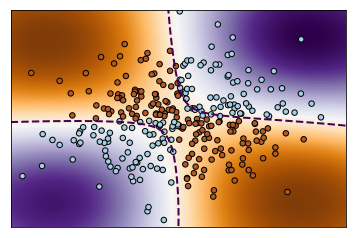

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def main():
    # 1. random 함수의 0번째 seed 값을 입력해 보세요.
    np.random.seed(123)
    # 4. random.randn 컬럼을 2로 유지한 채, 데이터의 개수를 300에서 다른 값으로 바꿔서 출력해 보세요.
    X = np.random.randn(300, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    
    # 2. nonlinear kernel 중 대표적인 값 'rbf'를 kernel 인자로 넣어봅시다.
    ### 'rbf' 외에 'poly', 'sigmoid' 를 넣고, 'gamma', 'C' 값을 조절해가며 어떻게 분류가 진행되는 지 확인해 보세요.
    svm_kernel = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
    # 3. SVM을 학습시키는 코드를 완성해 봅시다.
    svm_kernel.fit(X, Y)
    
    # svm_kernel의 결과를 출력해주는 함수입니다.
    plot_kernelSVM_result(svm_kernel, X, Y)


def plot_kernelSVM_result(svm_model, X, Y):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))

    # plot the decision function for each datapoint on the grid
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
               origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                           linestyles='dashed')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    # plt.show()
    
    print("XOR Classification Result : \n")
    plt.savefig('pictures/xor.png')
    
if __name__ == "__main__":
    main()

나이브 베이즈 분류 (Naive Bayes Classifier)
---------------

In [3]:
import numpy as np
    
def main():
	# 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = 8/20

    # 2. P(“확인” | “스팸 메일”) 의 확률을 구하세요.
    p_confirm_spam = 5/8
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = 12/20
    
    # 4. P(“확인” | "정상 메일" ) 의 확률을 구하세요.
    p_confirm_ham = 2/12
    
    # 5. P( "스팸 메일" | "확인" ) 의 확률을 구하세요.
    p_spam_confirm = 5/7
    
    # 6. P( "정상 메일" | "확인" ) 의 확률을 구하세요.
    p_ham_confirm = 2/7
    
    print("P(spam|confirm) = ",p_spam_confirm, "\nP(ham|confirm) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    result = normalization(value)
    
    print("P(spam|confirm) normalization = ",result[0], "\nP(ham|confirm) normalization = ",result[1], "\n")
    
    if p_spam_confirm > p_ham_confirm:
        print( round(result[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        print( round(result[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")

# 리스트 안에 값들을 정규화 합니다.
def normalization(x):
    return [element / sum(x) for element in x]
    

if __name__ == "__main__":
    main()

P(spam|confirm) =  0.7142857142857143 
P(ham|confirm) =  0.2857142857142857 

P(spam|confirm) normalization =  0.7142857142857143 
P(ham|confirm) normalization =  0.2857142857142857 

71.43 % 의 확률로 스팸 메일에 가깝습니다.


나이브 베이즈 분류2 (Naive Bayes Classifier)
-------------------

In [4]:
import numpy as np
    
def main():
	# 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = 25/60

    # 2. P("확인" | "스팸 메일"), P("exe" | "스팸 메일") 의 확률을 구하세요.
    p_confirm_spam = 8/25
    p_exe_spam = 3/25
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = 35/60
    
    # 4. P("확인" | 정상 메일"), P("exe" | 정상 메일") 의 확률을 구하세요.
    p_confirm_ham = 5/35
    p_exe_ham = 2/35
    
    # 5. P( "스팸 메일" | "확인" ) 의 확률을 구하세요.
    p_spam_confirm = 8/13
    
    # 6. P( "정상 메일" | "확인" ) 의 확률을 구하세요.
    p_ham_confirm = 5/13
    
    print("P(spam|confirm, exe) = ",p_spam_confirm, "\nP(ham|confirm, exe) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    result = normalization(value)
    
    print("P(spam|confirm, exe) normalization = ",result[0], "\nP(ham|confirm, exe) normalization = ",result[1], "\n")
    
    if p_spam_confirm > p_ham_confirm:
        print( round(result[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        norm_result = softmax(result)[1]
        print( round(result[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")

# 리스트 안에 값들을 정규화 합니다.
def normalization(x):
    return [element / sum(x) for element in x]
    

if __name__ == "__main__":
    main()

P(spam|confirm, exe) =  0.6153846153846154 
P(ham|confirm, exe) =  0.38461538461538464 

P(spam|confirm, exe) normalization =  0.6153846153846154 
P(ham|confirm, exe) normalization =  0.38461538461538464 

61.54 % 의 확률로 스팸 메일에 가깝습니다.


Logistic regression
--------------

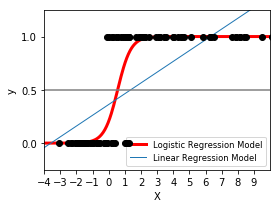

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit


def main():
    np.random.seed(0)
    n_samples = 100
    
    X = np.random.normal(size=n_samples)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size=n_samples)
    X = X[:, np.newaxis]

    # 1. Logistic Regression model을 호출해 봅시다.
    C=1e5
    solver='lbfgs'
    clf = linear_model.LogisticRegression(C=C, solver=solver)
    clf.fit(X, y)
    
    # plot을 그려줍니다.
    plot_logistic_regression(clf, X, y)


# plot을 그려주는 함수입니다.
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()

    plt.savefig('pictures/image.png')


if __name__ == "__main__":
    main()

Softmax Regression
-------------

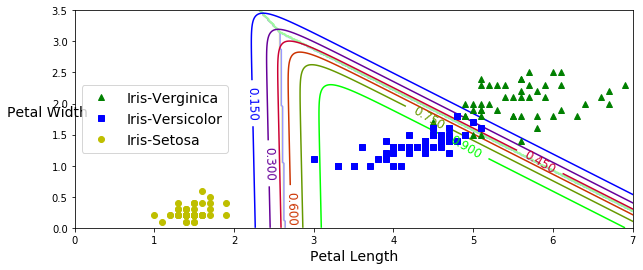

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris['data'][:, (2, 3)] # Petal lenght and Petal Width
y = iris['target']
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10, random_state = 42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Verginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contour(x0, x1, zz, cmap = custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap = plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14, rotation = 0)
plt.legend(loc='center left', fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()

print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

Scikit-learn을 활용한 나이브 베이즈 분류
--------------

In [6]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def main():
    wine = load_wine()

    ## wine은 X값인 wine.data와 Y값인 wine.target으로 나뉩니다.
    # 1. wine.data를 DataFrame 형태로 변형해보세요.
    df_wine_X = pd.DataFrame(wine.data, columns=wine.feature_names)
    df_wine_Y = pd.DataFrame(wine.target)

    # 2. df_wine_X, df_wine_Y의 shape를 확인해 보세요.
    print("df_wine_X shape : ", df_wine_X.shape)
    print("df_wine_Y shape : ", df_wine_Y.shape)

    # 3. df_wine_X, df_wine_Y의 앞부분 5행의 데이터를 확인해보세요.
    print("\ndf_wine_X head : ", df_wine_X.head())
    print("\ndf_wine_Y head : ", df_wine_Y.head())
    
    
    # 4. wine.data, wine.target 데이터로 8:2의 비율로 train data 와 test data를 분리해보세요.
    X_train, X_test, y_train, y_test = train_test_split(df_wine_X, df_wine_Y, test_size=0.2, random_state=123)  

    # 5. 가우시안 나이브 베이즈로 모델을 트레이닝을 진행합니다. None을 완성하세요.
    model = GaussianNB()
    model.fit(X_train, y_train)

    # 6. X test 데이터로 모델이 잘 동작하는지 문제를 풀어봅니다.
    predicted = model.predict(X_test)

    ## confusion matrix로 분류 성능을 확인해봅니다.
    print("\nConfusion matrix : ")
    print(confusion_matrix(y_test, predicted)) 
    
    return df_wine_X, X_train, X_test, y_train, y_test, predicted


if __name__ == "__main__":
    main()

df_wine_X shape :  (178, 13)
df_wine_Y shape :  (178, 1)

df_wine_X head :     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Reference
-------

In [7]:
# Scikit-Learn의 metrics 패키지에서는 정밀도, 재현율, F1-score를 구하는 classification_report 명령을 제공한다.
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

   micro avg       0.57      0.57      0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [8]:
np.logical_xor([True, True, False, False], [True, False, True, False])

array([False,  True,  True, False])

In [10]:
# 이러한 그리드 포인트를 만드는 과정을 도와주는 것이 meshgrid 명령이다. 
# meshgrid 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 
# 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.
x = np.arange(3)
y = np.arange(5)
X, y = np.meshgrid(x, y)
print(X, y)
print([list(zip(x, y)) for x, y in zip(X, y)])

[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]] [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[[(0, 0), (1, 0), (2, 0)], [(0, 1), (1, 1), (2, 1)], [(0, 2), (1, 2), (2, 2)], [(0, 3), (1, 3), (2, 3)], [(0, 4), (1, 4), (2, 4)]]


In [12]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.c_[a,b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [13]:
x = np.arange(12).reshape(3, 4)
np.ravel(x, order='C')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
# 이렇게 같은 배열에 대해 차원만 1차원 증가시키는 경우에는 newaxis 명령을 사용하기도 한다.
x = np.arange(5)
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])